In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Salary_Data.csv')
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


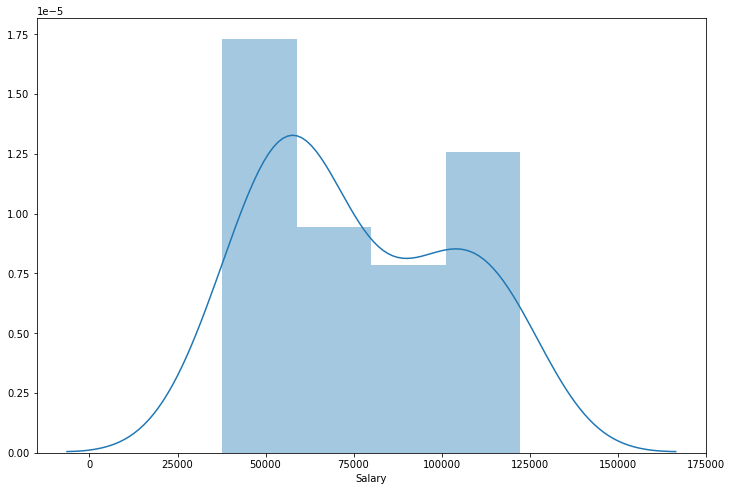

In [5]:
fig = plt.figure(figsize=(12,8))
sns.distplot(df['Salary'])

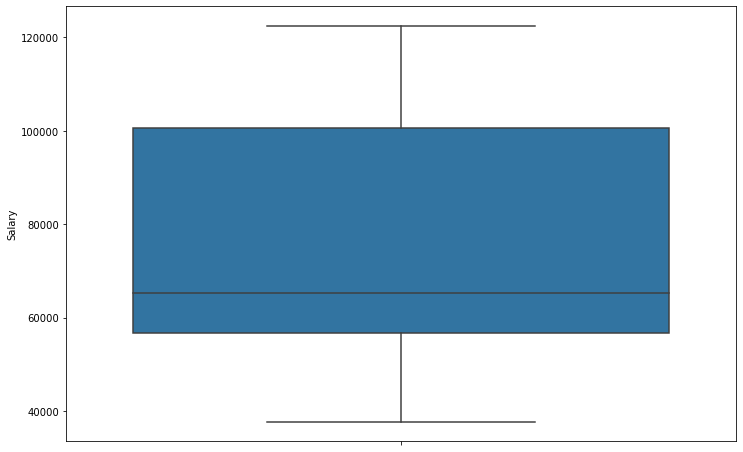

In [6]:
fig = plt.figure(figsize=(12,8))
sns.boxplot(df['Salary'], orient='v')

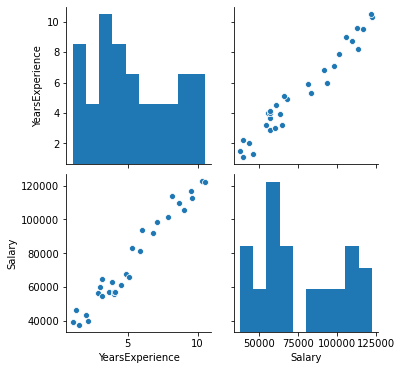

In [7]:
sns.pairplot(df)

In [8]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


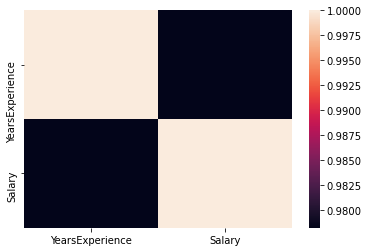

In [9]:
sns.heatmap(df.corr())

# ขั้นตอนแรกของ SVR Data Transformation

In [10]:
# Independent var
x = np.array(df['YearsExperience']).reshape(-1,1)
x

array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [11]:
y = np.array(df['Salary']).reshape(-1,1)
y

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [12]:
type(x)

numpy.ndarray

In [13]:
print(x)
print(y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[[ 39343.]
 [ 46205.]
 [ 37731.]
 [ 43525.]
 [ 39891.]
 [ 56642.]
 [ 60150.]
 [ 54445.]
 [ 64445.]
 [ 57189.]
 [ 63218.]
 [ 55794.]
 [ 56957.]
 [ 57081.]
 [ 61111.]
 [ 67938.]
 [ 66029.]
 [ 83088.]
 [ 81363.]
 [ 93940.]
 [ 91738.]
 [ 98273.]
 [101302.]
 [113812.]
 [109431.]
 [105582.]
 [116969.]
 [112635.]
 [122391.]
 [121872.]]


#  ขั้นตอนที่ 2 Data  Scaling

In [14]:
# standardization > mean = 0 , std =1 
# in case of there is au huge difference between x,y (dependent var, independent var)
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y =StandardScaler()

x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

print(x)
print(y)

[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]
 [ 1.21377673]
 [ 1.32129632]
 [ 1.50049564]
 [ 1.5363355 ]
 [ 1.78721455]
 [ 1.85889428]]
[[-1.36011263]
 [-1.10552744]
 [-1.419919  ]
 [-1.20495739]
 [-1.33978143]
 [-0.71830716]
 [-0.58815781]
 [-0.79981746]
 [-0.42881019]
 [-0.69801306]
 [-0.47433279]
 [-0.74976858]
 [-0.70662043]
 [-0.70201994]
 [-0.55250402]
 [-0.29921736]
 [-0.37004264]
 [ 0.26285865]
 [ 0.19885989]
 [ 0.66547573]
 [ 0.58377993]
 [ 0.82623317]
 [ 0.93861127]
 [ 1.40274136]
 [ 1.24020308]
 [ 1.09740238]
 [ 1.51986835]
 [ 1.3590738 ]
 [ 1.72102849]
 [ 1.70177321]]


# ขั้นตอนที่ 3 สร้างModel

In [15]:
# default param
# linear, non-linear relationship > poly, radial basis function
# เป็น SVR ที่ Kernal เป็น Linear
from sklearn.svm import SVR
regressor = SVR(kernel= 'linear')
regressor.fit(x,y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR(kernel='linear')

In [16]:
x_test = sc_x.transform([[11.0]])
x_test

array([[2.0380936]])

In [17]:
# same data type
result = regressor.predict(x_test)
print(result)

[1.93415054]


In [18]:
# ต้องแปลงข้อมูลให้กลับเป็นค่าเดิม ก่อนที่จะทำ Standardization (Inverse จากค่าzให้เป็นค่าx)
sc_y.inverse_transform(result)

array([128135.41717593])

In [19]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[11.0]])))

array([128135.41717593])

In [20]:
sc_y.inverse_transform(regressor.predict(sc_x.transform([[0.8]])))

array([33875.28250897])

In [21]:
x

array([[-1.51005294],
       [-1.43837321],
       [-1.36669348],
       [-1.18749416],
       [-1.11581443],
       [-0.86493538],
       [-0.82909552],
       [-0.75741579],
       [-0.75741579],
       [-0.57821647],
       [-0.50653674],
       [-0.47069688],
       [-0.47069688],
       [-0.43485702],
       [-0.29149756],
       [-0.1481381 ],
       [-0.07645838],
       [-0.00477865],
       [ 0.21026054],
       [ 0.2461004 ],
       [ 0.53281931],
       [ 0.6403389 ],
       [ 0.92705781],
       [ 1.03457741],
       [ 1.21377673],
       [ 1.32129632],
       [ 1.50049564],
       [ 1.5363355 ],
       [ 1.78721455],
       [ 1.85889428]])

In [22]:
predicted = sc_y.inverse_transform(regressor.predict(x))
print(predicted)

[ 36647.63941094  38495.87734559  40344.11528023  44964.71011685
  46812.9480515   53281.78082276  54205.89979008  56054.13772473
  56054.13772473  60674.73256134  62522.97049599  63447.08946331
  63447.08946331  64371.20843063  68067.68429993  71764.16016922
  73612.39810386  75460.63603851  81005.34984245  81929.46880977
  89322.42054836  92094.77745033  99487.72918891 102260.08609088
 106880.68092749 109653.03782946 114273.63266608 115197.7516334
 121666.58440466 123514.82233931]


<function matplotlib.pyplot.show(*args, **kw)>

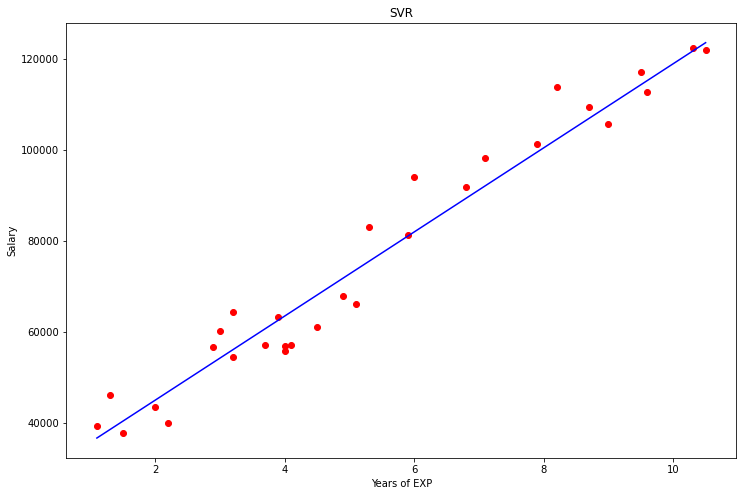

In [23]:
fig = plt.figure(figsize=(12,8))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color='blue')
plt.title('SVR')
plt.xlabel('Years of EXP')
plt.ylabel('Salary')
plt.show

In [24]:
from sklearn import metrics

In [25]:
print('RMSE=',np.sqrt(metrics.mean_squared_error(predicted,sc_y.inverse_transform(y))))

RMSE= 5637.903935554286


In [12]:
print(x)
print(y)

[[-1.51005294]
 [-1.43837321]
 [-1.36669348]
 [-1.18749416]
 [-1.11581443]
 [-0.86493538]
 [-0.82909552]
 [-0.75741579]
 [-0.75741579]
 [-0.57821647]
 [-0.50653674]
 [-0.47069688]
 [-0.47069688]
 [-0.43485702]
 [-0.29149756]
 [-0.1481381 ]
 [-0.07645838]
 [-0.00477865]
 [ 0.21026054]
 [ 0.2461004 ]
 [ 0.53281931]
 [ 0.6403389 ]
 [ 0.92705781]
 [ 1.03457741]
 [ 1.21377673]
 [ 1.32129632]
 [ 1.50049564]
 [ 1.5363355 ]
 [ 1.78721455]
 [ 1.85889428]]
[[-1.36011263]
 [-1.10552744]
 [-1.419919  ]
 [-1.20495739]
 [-1.33978143]
 [-0.71830716]
 [-0.58815781]
 [-0.79981746]
 [-0.42881019]
 [-0.69801306]
 [-0.47433279]
 [-0.74976858]
 [-0.70662043]
 [-0.70201994]
 [-0.55250402]
 [-0.29921736]
 [-0.37004264]
 [ 0.26285865]
 [ 0.19885989]
 [ 0.66547573]
 [ 0.58377993]
 [ 0.82623317]
 [ 0.93861127]
 [ 1.40274136]
 [ 1.24020308]
 [ 1.09740238]
 [ 1.51986835]
 [ 1.3590738 ]
 [ 1.72102849]
 [ 1.70177321]]


In [8]:
### Support Vector Regression > kernel  > rbf (Radial basis function)
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x,y)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [13]:
predicted = sc_y.inverse_transform(regressor.predict(x))
print(predicted)

[ 43296.16442868  43502.718266    43998.28879802  46225.11502223
  47386.68192568  51916.02026083  52580.73860814  53915.0561013
  53915.0561013   57368.10532126  58863.00698958  59650.28593501
  59650.28593501  60469.29008332  64127.60010341  68487.23942334
  70928.37326913  73518.24037208  81811.19849278  83210.33288804
  93595.16637346  96888.85481804 104003.6946568  106238.13870622
 109727.58008953 111727.14783308 114787.37007368 115328.28632694
 117879.97587636 118069.6713812 ]


<function matplotlib.pyplot.show(*args, **kw)>

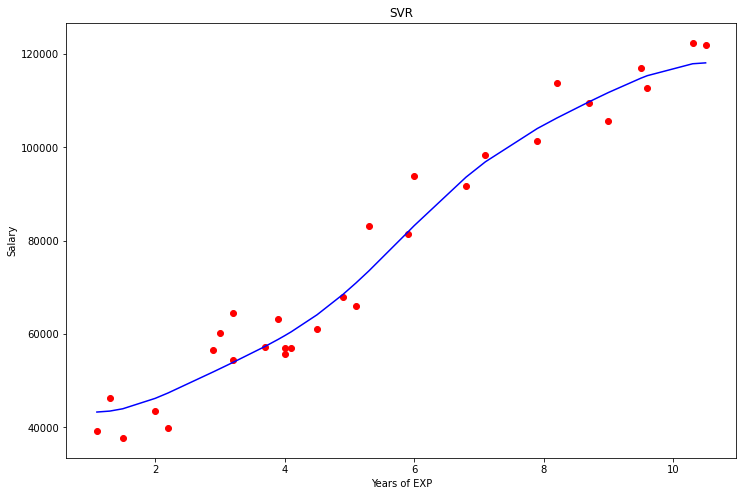

In [14]:
fig = plt.figure(figsize=(12,8))
plt.scatter(sc_x.inverse_transform(x),sc_y.inverse_transform(y),color = 'red')
plt.plot(sc_x.inverse_transform(x),sc_y.inverse_transform(regressor.predict(x)),color='blue')
plt.title('SVR')
plt.xlabel('Years of EXP')
plt.ylabel('Salary')
plt.show

In [18]:
y

array([[-1.36011263],
       [-1.10552744],
       [-1.419919  ],
       [-1.20495739],
       [-1.33978143],
       [-0.71830716],
       [-0.58815781],
       [-0.79981746],
       [-0.42881019],
       [-0.69801306],
       [-0.47433279],
       [-0.74976858],
       [-0.70662043],
       [-0.70201994],
       [-0.55250402],
       [-0.29921736],
       [-0.37004264],
       [ 0.26285865],
       [ 0.19885989],
       [ 0.66547573],
       [ 0.58377993],
       [ 0.82623317],
       [ 0.93861127],
       [ 1.40274136],
       [ 1.24020308],
       [ 1.09740238],
       [ 1.51986835],
       [ 1.3590738 ],
       [ 1.72102849],
       [ 1.70177321]])

In [19]:
sc_y.inverse_transform(y)

array([[ 39343.],
       [ 46205.],
       [ 37731.],
       [ 43525.],
       [ 39891.],
       [ 56642.],
       [ 60150.],
       [ 54445.],
       [ 64445.],
       [ 57189.],
       [ 63218.],
       [ 55794.],
       [ 56957.],
       [ 57081.],
       [ 61111.],
       [ 67938.],
       [ 66029.],
       [ 83088.],
       [ 81363.],
       [ 93940.],
       [ 91738.],
       [ 98273.],
       [101302.],
       [113812.],
       [109431.],
       [105582.],
       [116969.],
       [112635.],
       [122391.],
       [121872.]])

In [20]:
print('RMSE=',np.sqrt(metrics.mean_squared_error(predicted,sc_y.inverse_transform(y))))

RMSE= 5046.741493204375
